In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, exposure
from skimage.filters import threshold_otsu
from skimage.morphology import medial_axis, skeletonize
import glob, os
from IPython.display import clear_output # for clearing output
from scipy.ndimage import gaussian_filter

import tube_filter as rml

# Image Analysis using the Hessian tube filter



## Define base-filename and parameters

In [2]:
path = r"XXX\XXX"
basefilename = path + r'\test_image_tube_filter'

#define parameters
#CLAHE
ntiles_x = 32
ntiles_y = 32
cliplimit=0.01

#Gaussian filter

Sigma=0.2


## 1.Step: Load image and correct exposure

<IPython.core.display.Javascript object>


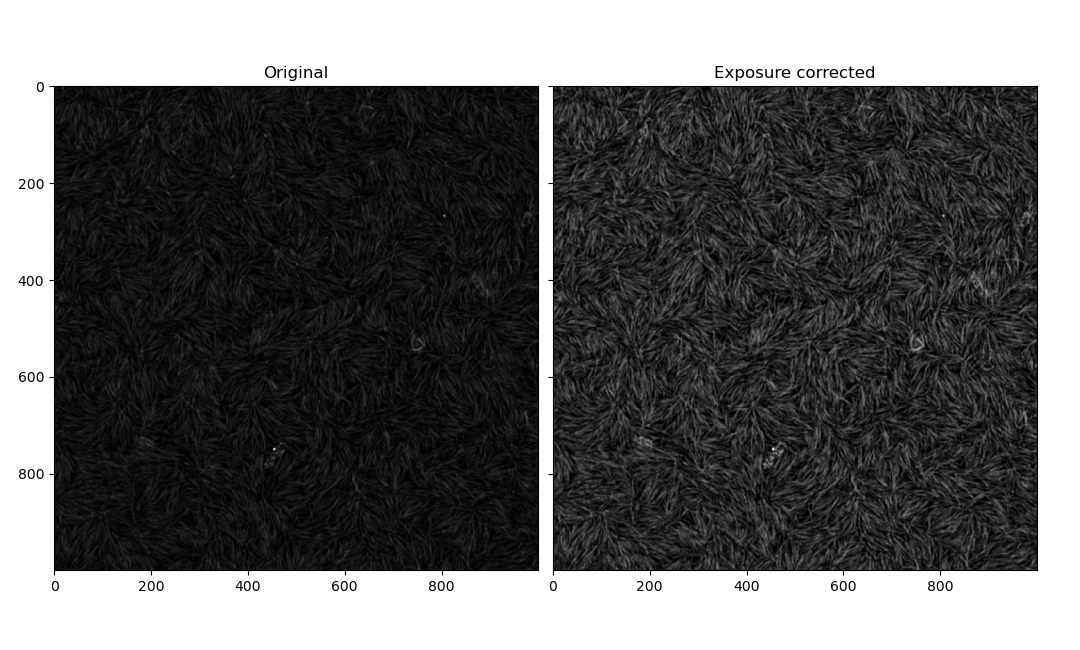

In [3]:
img1 = plt.imread(basefilename + '.tif')

img1 = (img1-img1.min())/(img1.max()-img1.min())

CLAHE_size = (np.round(img1.shape[0] / ntiles_y), 
                    np.round(img1.shape[1] / ntiles_x)) 
        
img1a = exposure.equalize_hist(img1)
img1b = exposure.equalize_adapthist(img1, kernel_size= CLAHE_size ,clip_limit=cliplimit)
img1b = gaussian_filter(img1b, sigma=Sigma)

rml.showstereo(img1,img1b,
                left_title = 'Original',
                right_title = 'Exposure corrected')

## 2.Step: Apply tube filter

Sigma tubefilter can be changed if needed, 1.0 is a good starting point)

<IPython.core.display.Javascript object>


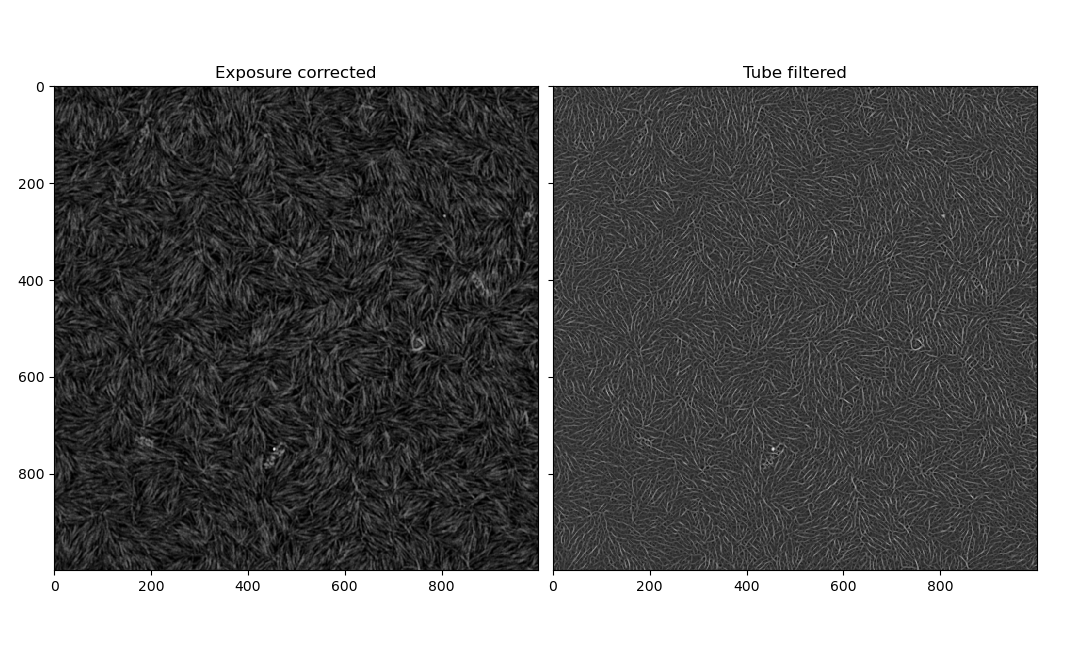

In [4]:
img2 = rml.tube_filter(img1b,sigma=1.0)                      
img2 = (img2-img2.min())/(img2.max()-img2.min())


rml.showstereo(img1b,img2,
              left_title='Exposure corrected',
              right_title='Tube filtered')

## 3.Step: Adaptive thresholding 

(Otsu's algorithm)

<IPython.core.display.Javascript object>


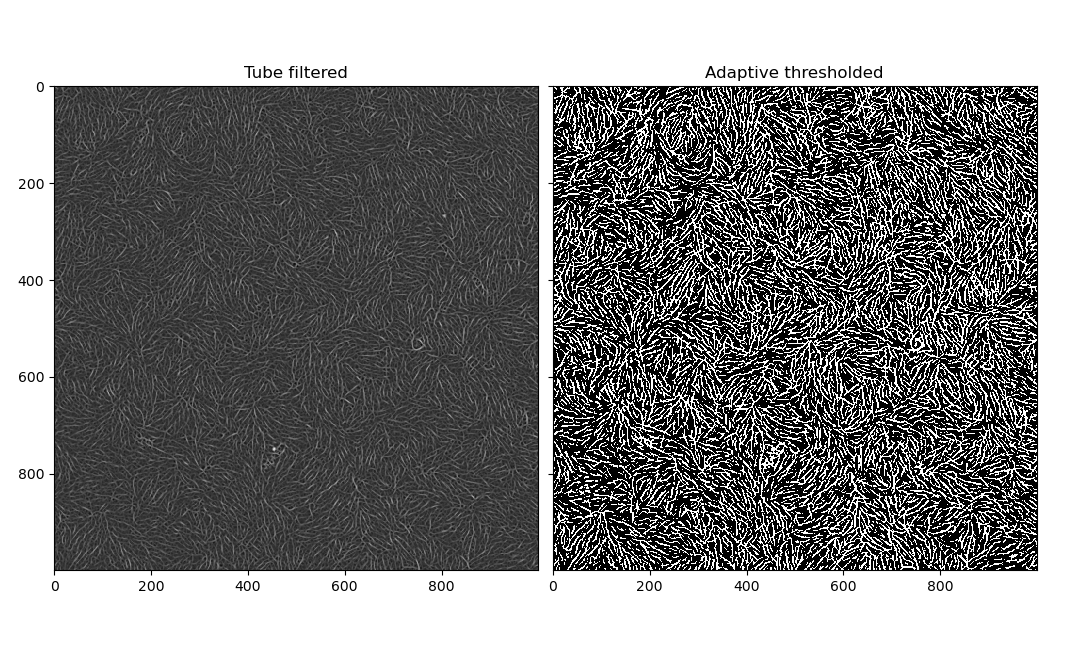

In [5]:
threshold = threshold_otsu(img2)
img3 = img2 > threshold 

rml.showstereo(img2,img3,
              left_title='Tube filtered',
              right_title='Adaptive thresholded')


## 4. Step: Adaptive skeletonization

<IPython.core.display.Javascript object>


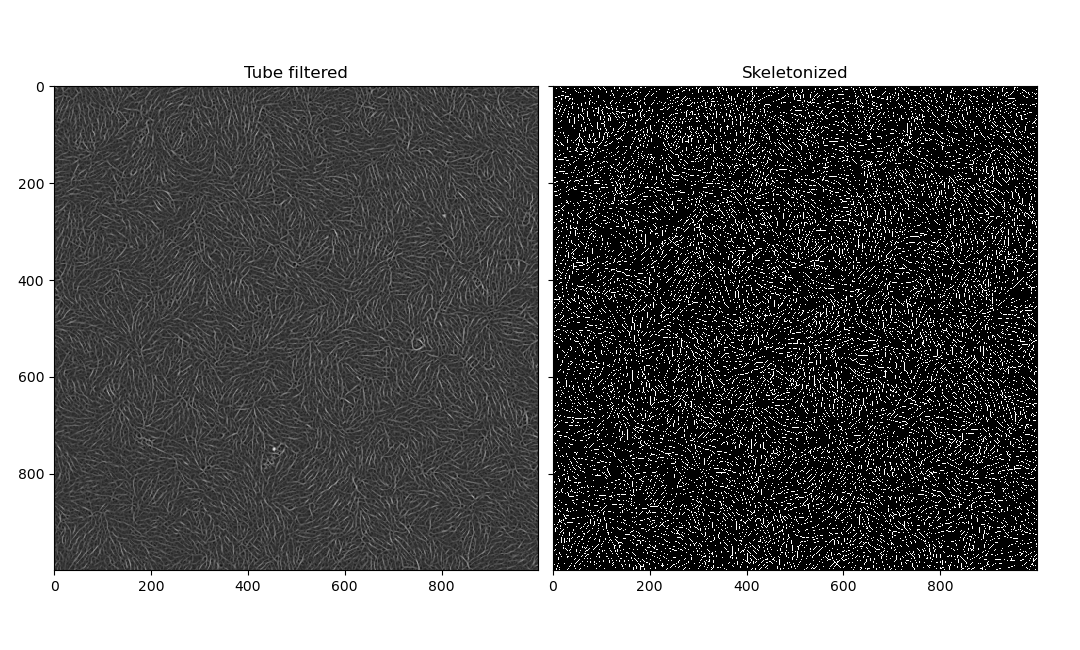

In [6]:
img4 =  skeletonize(img3, method='lee')
rml.showstereo(img2,img4,
              left_title='Tube filtered',
              right_title='Skeletonized')

plt.imsave(basefilename + ".skeleton.png",
           img4,
           cmap='gray')


## 5. Step: Plot skeleton upon tube filter

<IPython.core.display.Javascript object>


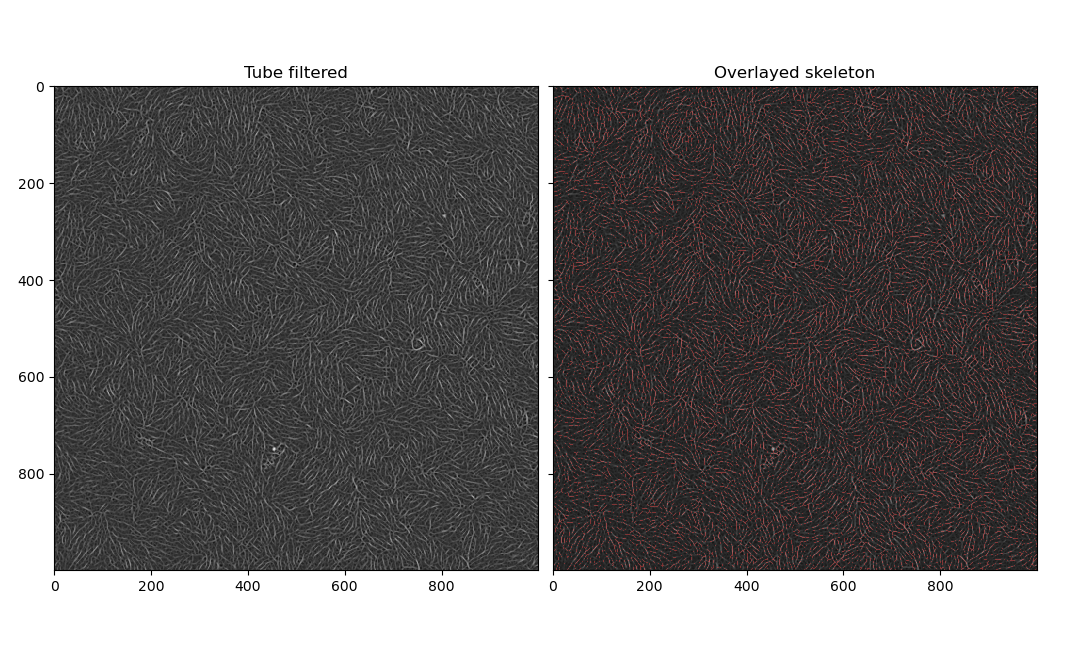

In [7]:

overlay = color.label2rgb(img4, image=img2, colors=[(1.0,0.0,0.0)], bg_label=0)

rml.showstereo(img2,overlay,
              left_title='Tube filtered',
              right_title='Overlayed skeleton')

## 6. Step: Plot skeleton upon original image 

<IPython.core.display.Javascript object>


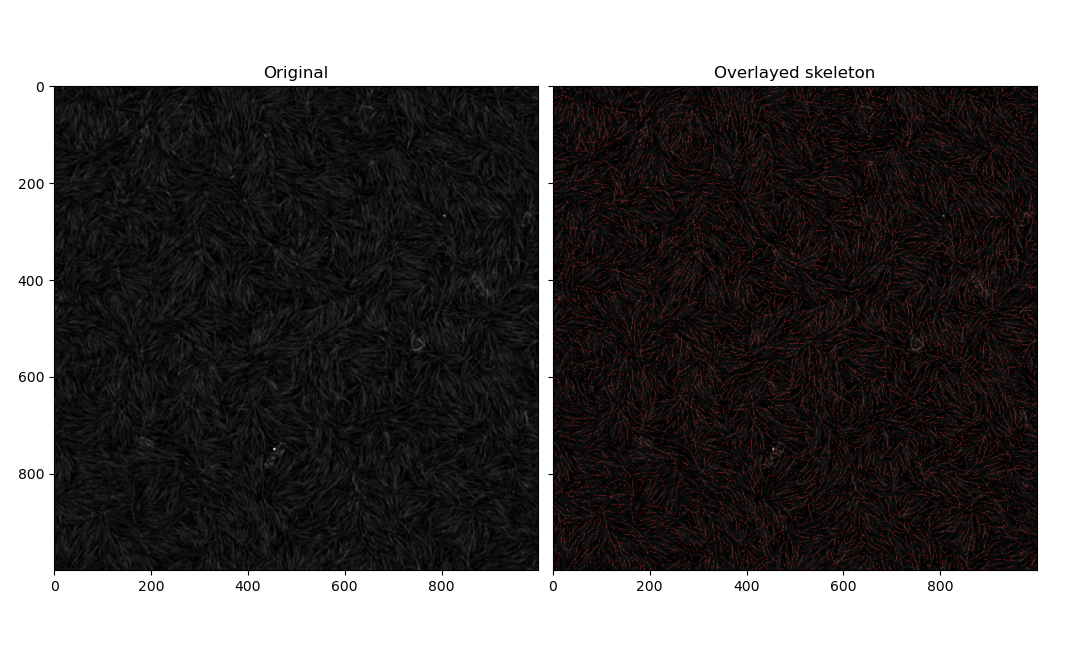

In [8]:
overlay = color.label2rgb(img4, image=img1, colors=[(1.0,0.0,0.0)], bg_label=0)

rml.showstereo(img1,overlay,
              left_title='Original',
              right_title='Overlayed skeleton')

## 7. Step: Find nodes in the skeleton
 

(4174, 2)


<IPython.core.display.Javascript object>


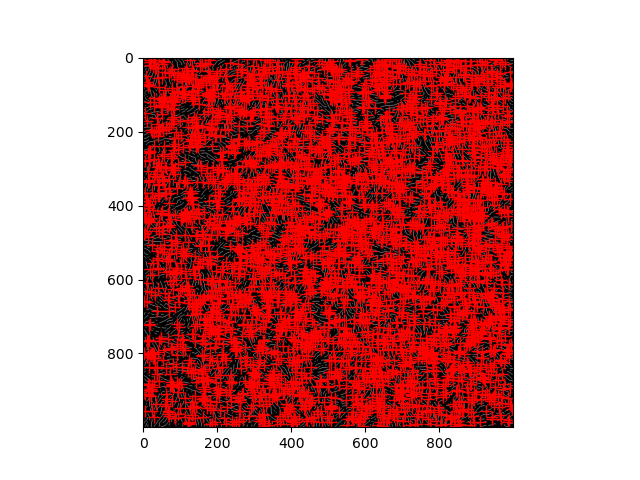

In [9]:
img4[img4 != 0] = 1
(nodes, crossmap) = rml.getNodes(img4, 
                                 minimal_distance=1,
                                 return_crossmap=True)
overlay = color.label2rgb(crossmap, image=img4, colors=[(1.0,0.0,0.0)], bg_label=0)
print(nodes.shape)
plt.figure()
plt.imshow(img4, cmap='gray')
plt.plot(nodes[:,1]+0.5,nodes[:,0]+0.5,'+r', markersize=8)
plt.show()

np.savetxt(basefilename + ".nodes.dat", nodes,
           delimiter='\t', 
           header="nodes " + "within the network")